E:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


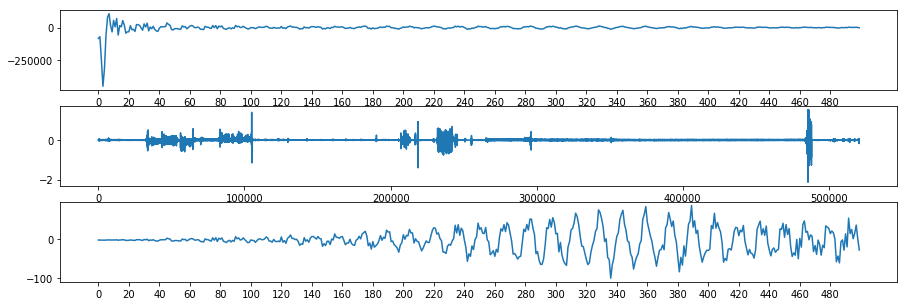

In [12]:
%matplotlib inline
from scipy import signal  
import math
import matplotlib.pyplot as pl  
import matplotlib  
from numpy import *
import numpy as np
from tkinter import *
import tkinter.filedialog as tk
import os
default_dir = r"C:\Users\lenovo\Desktop" 
fname = tk.askopenfilename(initialdir=(os.path.expanduser(default_dir)))
f=open(fname)
data=f.read()
f.close()
data2=[]
data1=data.split()
for x in data1:
    y=int(x)
    data2.append(y)
count=len(data2)
#print(count)
count=int(floor(count/100)*100)
data3=data2[:count]
#print(data3)
I=data3[::2]
Q=data3[1::2]
I=np.array(I)
Q=np.array(Q)
count=int(count/2)
argR0Signal=np.zeros(count)
for i in range (0,count):
    argR0Signal[i] = math.atan2(Q[i],I[i])
for i in range (1,count):
    if argR0Signal[i]-argR0Signal[i-1]>pi:
        argR0Signal[i] = argR0Signal[i] - 2*pi
    elif argR0Signal[i]-argR0Signal[i-1]<-pi:
        argR0Signal[i] = argR0Signal[i] + 2*pi
#argR0Signal=np.transpose(argR0Signal)
#fout=open('data.txt', 'w')
#for i in range(len(argR0Signal)):
    #fout.write(str(argR0Signal[i]))
    #fout.write('\n')
#fout.close()
hs=np.fft.fft(argR0Signal)
pl.figure(figsize=(15, 5))
pl.subplot(311)
pl.xlabel('freq(HZ)')
my_x_ticks = np.arange(0,500,20)
pl.xticks(my_x_ticks)
pl.plot(hs[:500])
b,a = signal.butter(1,0.04,'low')  
sf = signal.filtfilt(b,a,argR0Signal) 
b,a = signal.butter(1,0.015,'high')  
sf = signal.filtfilt(b,a,sf)  
pl.subplot(312)
pl.plot(sf)
sf_fft=np.fft.fft(sf)
pl.subplot(313)
pl.xticks(my_x_ticks)
pl.plot(sf_fft[:500])

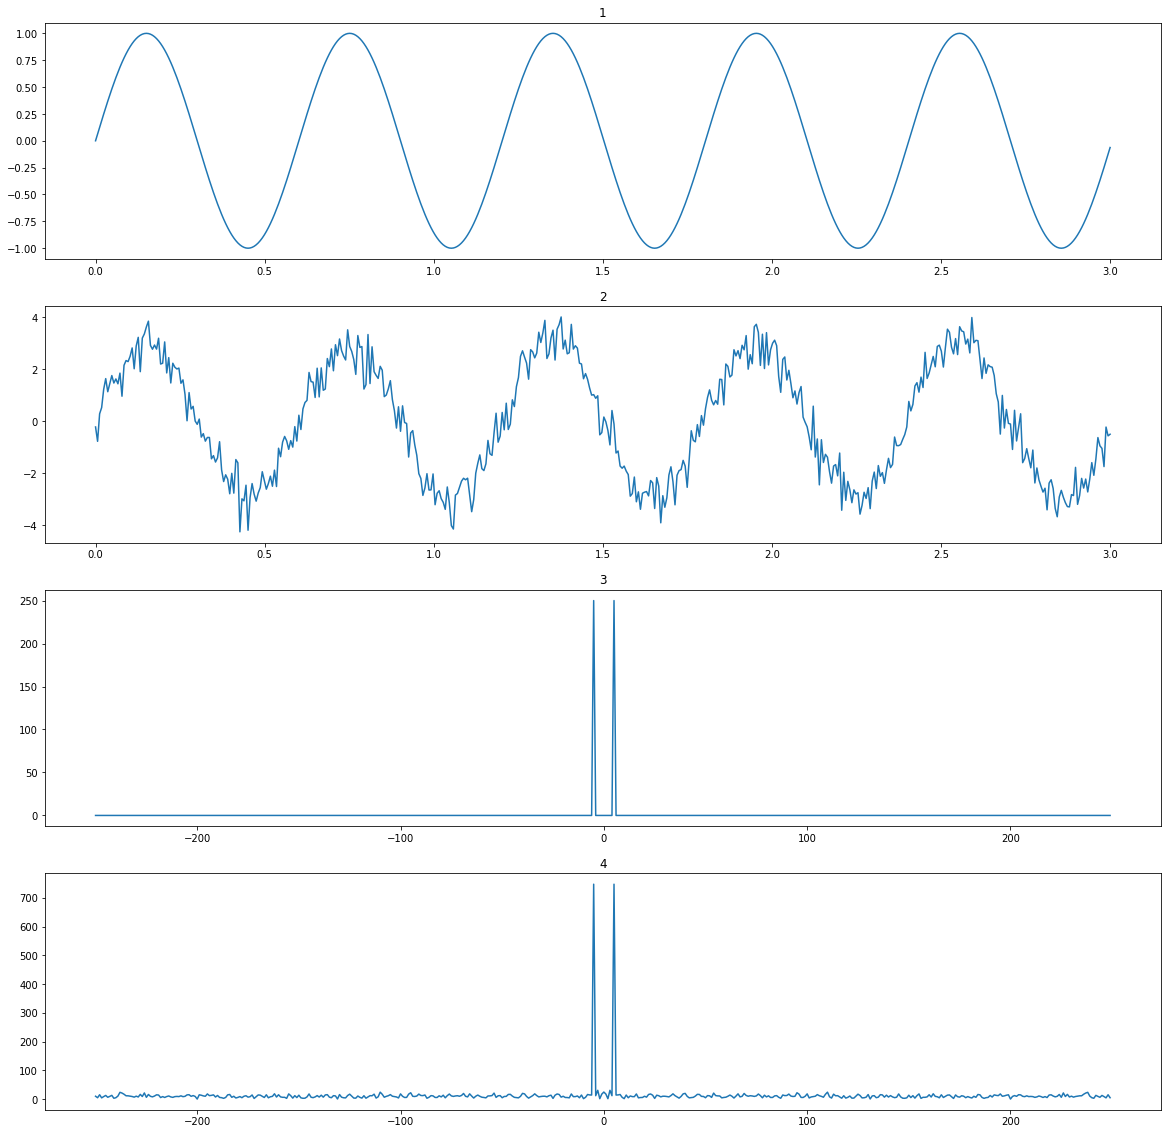

AttributeError: 'list' object has no attribute 'type'

In [1]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as pl  
import matplotlib  
import math  
import random  
  
row = 4  
col = 4  
  
N = 500  
fs = 5  
n = [2*math.pi*fs*t/N for t in range(N)]    # 生成了500个介于0.0-31.35之间的点  
# print n  
axis_x = np.linspace(0,3,num=N)  
  
#频率为5Hz的正弦信号  
pl.figure(figsize=(20, 20)) 
x = [math.sin(i) for i in n]  
pl.subplot(411)  
pl.plot(axis_x,x)  
pl.title("1")  
pl.axis('tight')  
  
#频率为5Hz、幅值为3的正弦+噪声  
x1 = [random.gauss(0,0.5) for i in range(N)]  
xx = []  
#有没有直接两个列表对应项相加的方式？？  
for i in range(len(x)):  
    xx.append(x[i]*3 + x1[i])  

pl.subplot(412)  
pl.plot(axis_x,xx)  
pl.title("2")  
pl.axis('tight')  
  
#频谱绘制  
xf = np.fft.fft(x)  
xf_abs = np.fft.fftshift(abs(xf))  
axis_xf = np.linspace(-N/2,N/2-1,num=N)  
pl.subplot(413)  
pl.title("3")  
pl.plot(axis_xf,xf_abs)  
pl.axis('tight')  
  
#频谱绘制  
xf = np.fft.fft(xx)  
xf_abs = np.fft.fftshift(abs(xf))  
pl.subplot(414)  
pl.title("4")  
pl.plot(axis_xf,xf_abs)  
pl.axis('tight')  
  
pl.show()  
print (xx.type)